In [0]:
import re
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt

> **Data from 20150101 to today**



In [0]:
from datetime import datetime
start = '20150101'
today = datetime.today().strftime('%Y%m%d')

## Litecoin

In [0]:
url = 'https://coinmarketcap.com/currencies/litecoin/historical-data/?start='+start+'&end='+today
r = requests.get(url)
soup = BeautifulSoup(r.text, 'lxml')
divs = soup.find_all(class_ = 'table')

In [0]:
csvfile = open('litecoin_data.csv', 'w')
header = ['Open','High','Low','Close', 'Volume', 'Market Cap'] # not written to csv
filewriter = csv.writer(csvfile)
filewriter.writerow(header)

In [0]:
entries = soup.find_all('td')
temp = []
for i in range(len(entries)):
  
  if i % 7 == 0:
    if i != 0:
      filewriter.writerow(temp)
      temp = []
  else:
    temp.append(entries[i].text)
    temp = [temp[i].replace(',', '') for i in range(len(temp))]
    

In [0]:
df_1 = pd.read_csv('./litecoin_data.csv')
df_1.apply(pd.to_numeric)

## Ethereum

In [0]:
url = 'https://coinmarketcap.com/currencies/ethereum/historical-data/?start='+start+'&end='+today
r = requests.get(url)
soup = BeautifulSoup(r.text, 'lxml')
divs = soup.find_all(class_ = 'table')

In [0]:
csvfile = open('ethereum_data.csv', 'w')
header = ['Open','High','Low','Close', 'Volume', 'Market Cap'] # not written to csv
filewriter = csv.writer(csvfile)
filewriter.writerow(header)

39

In [0]:
entries = soup.find_all('td')
temp = []
for i in range(len(entries)):
  
  if i % 7 == 0:
    if i != 0:
      filewriter.writerow(temp)
      temp = []
  else:
    temp.append(entries[i].text)
    temp = [temp[i].replace(',', '') for i in range(len(temp))]
    

In [0]:
df_2 = pd.read_csv('./ethereum_data.csv')
df_2.apply(pd.to_numeric)

In [0]:
corr = df_2.corr()
corr.style.background_gradient(cmap='coolwarm')

,Open,High,Low,Close,Volume,Market Cap
Open,1,0.998583,0.996535,0.99652,0.372037,0.996064
High,0.998583,1,0.996569,0.998488,0.376361,0.997646
Low,0.996535,0.996569,1,0.998004,0.367873,0.997879
Close,0.99652,0.998488,0.998004,1,0.373292,0.999377
Volume,0.372037,0.376361,0.367873,0.373292,1,0.394669
Market Cap,0.996064,0.997646,0.997879,0.999377,0.394669,1


## Bitcoin

### From bitcoin.com (39 features)

https://charts.bitcoin.com/btc/chart/price

Using Selenium without opening the browser

Download 39 csv files and merge to one

Delete data before 2013/03/01 **(update 7/24/19)**

#### Selenium in .py (work), data available starting after 2010/8/17

(**update 7/24/19**: starting after 2011/2/6)

**7/22: Merge to one csv**

**7/25: fix "inflation rate" column**

start from 2013/03/01

In [3]:
import csv
import os
from datetime import datetime as dt
!pip install xlsxwriter
import numpy as np
import pandas as pd

In [0]:
import xlsxwriter

output = xlsxwriter.Workbook('bitcoin_merged.xlsx')
filewriter = output.add_worksheet()

directory = "../content"
col_cnt = 1

for filename in os.listdir(directory):
  if filename.endswith(".csv"):
    df = pd.read_csv(filename)
    if col_cnt == 1: 
      filewriter.write(0, 0, df.columns[0]) # write header
    filewriter.write(0, col_cnt, df.columns[1]) # write header

    row_cnt = 1
    start_date = dt.strptime("10/08/17", "%y/%m/%d")
    
    for i in range(df.shape[0]):
      current_date = dt.strptime(df.iloc[i][0], "%Y-%m-%d")
      if start_date <= current_date:
        if(col_cnt == 1):
          filewriter.write(row_cnt, 0, df.iloc[i][0])
        filewriter.write(row_cnt, col_cnt, df.iloc[i][1])
        row_cnt += 1
      elif df.columns[1] == 'Inflation Rate':
        row_cnt += 173
        
    col_cnt += 1
#     print(col_cnt)
        
output.close()

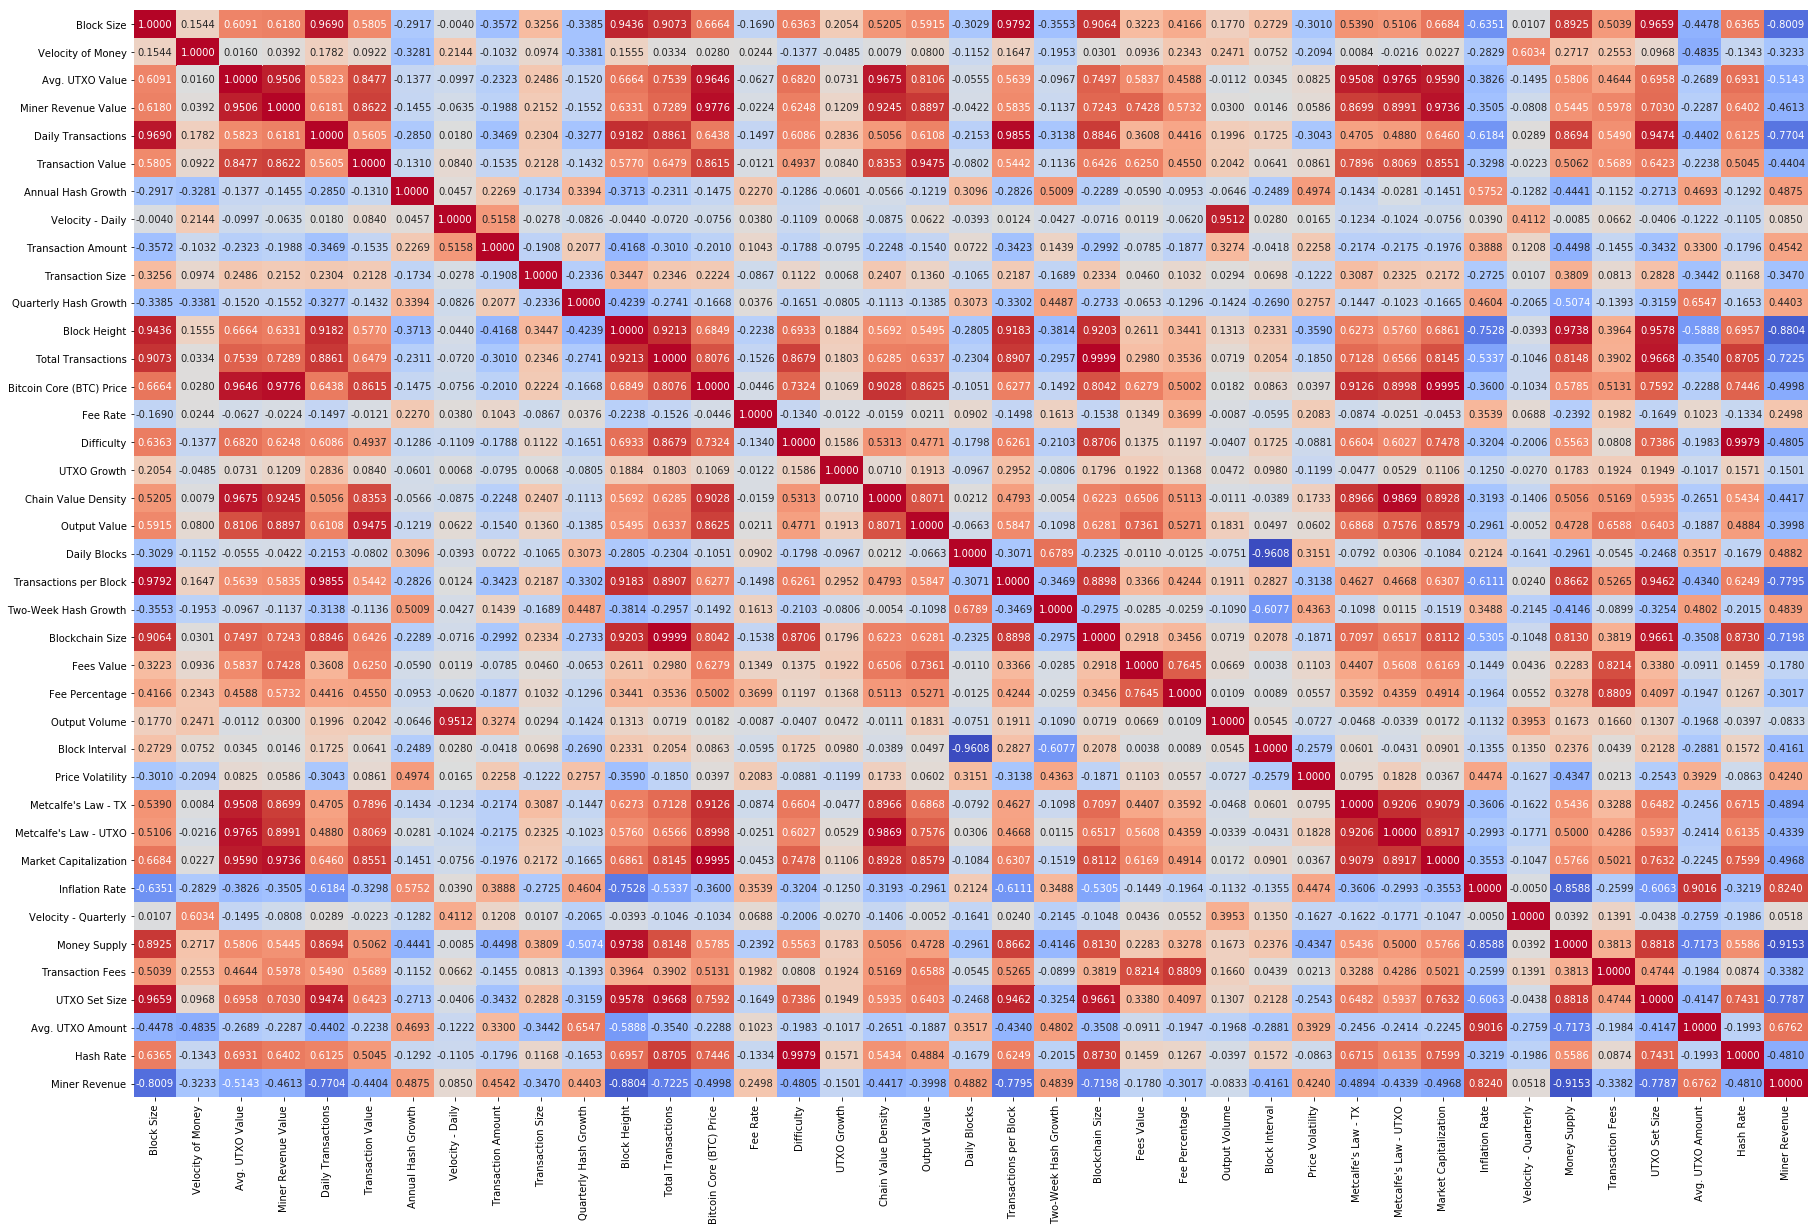

In [8]:
# import matplotlib.pyplot as plt

bitcoin_df = pd.read_excel('./bitcoin_merged.xlsx')
# # plt.matshow(df.corr())
# # plt.show()
# corr = bitcoin_df.corr()
# corr.style.background_gradient(cmap='coolwarm')

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(30, 20)
sns.heatmap(bitcoin_df.corr(method='pearson'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)